## Layers and Objects

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]


## Basic Dense Layer

In [3]:
class Layer_Dense:
    def __init__(self, n_inputs: int, n_neurons: int) -> None:
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs: np.array):
        self.output = np.dot(inputs, self.weights) + self.biases

In [4]:
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

In [5]:
layer1.forward(X)

In [6]:
layer1.output

array([[ 0.10758131,  1.03983522,  0.24462411,  0.31821498,  0.18851053],
       [-0.08349796,  0.70846411,  0.00293357,  0.44701525,  0.36360538],
       [-0.50763245,  0.55688422,  0.07987797, -0.34889573,  0.04553042]])

In [7]:
layer2.forward(layer1.output)
layer2.output

array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])

## Activation Functions

Step function wont say how close we were to output a 1
ReLU over sigmoid because it's simple and fast

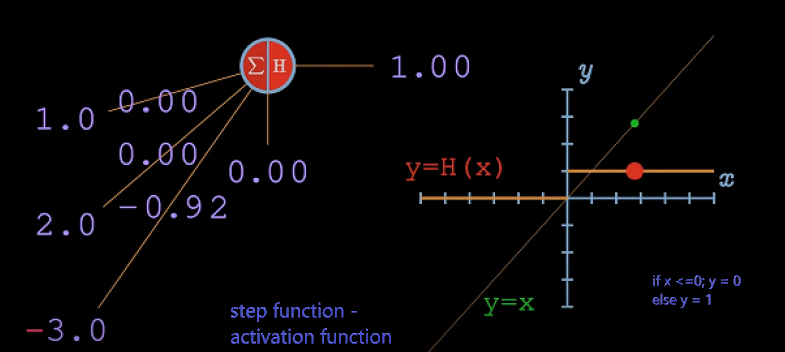

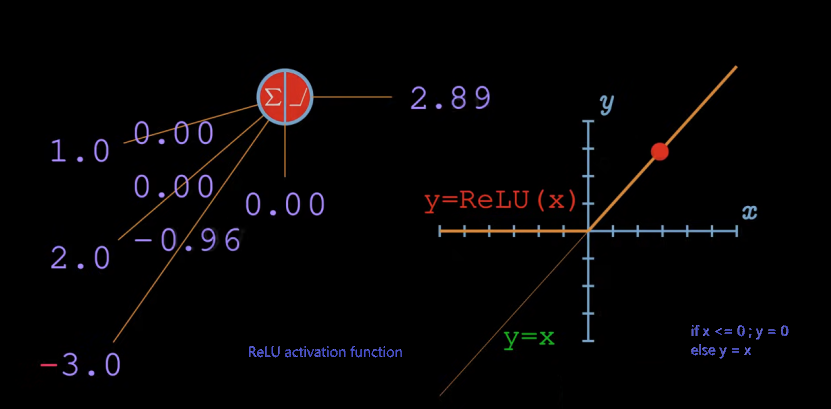

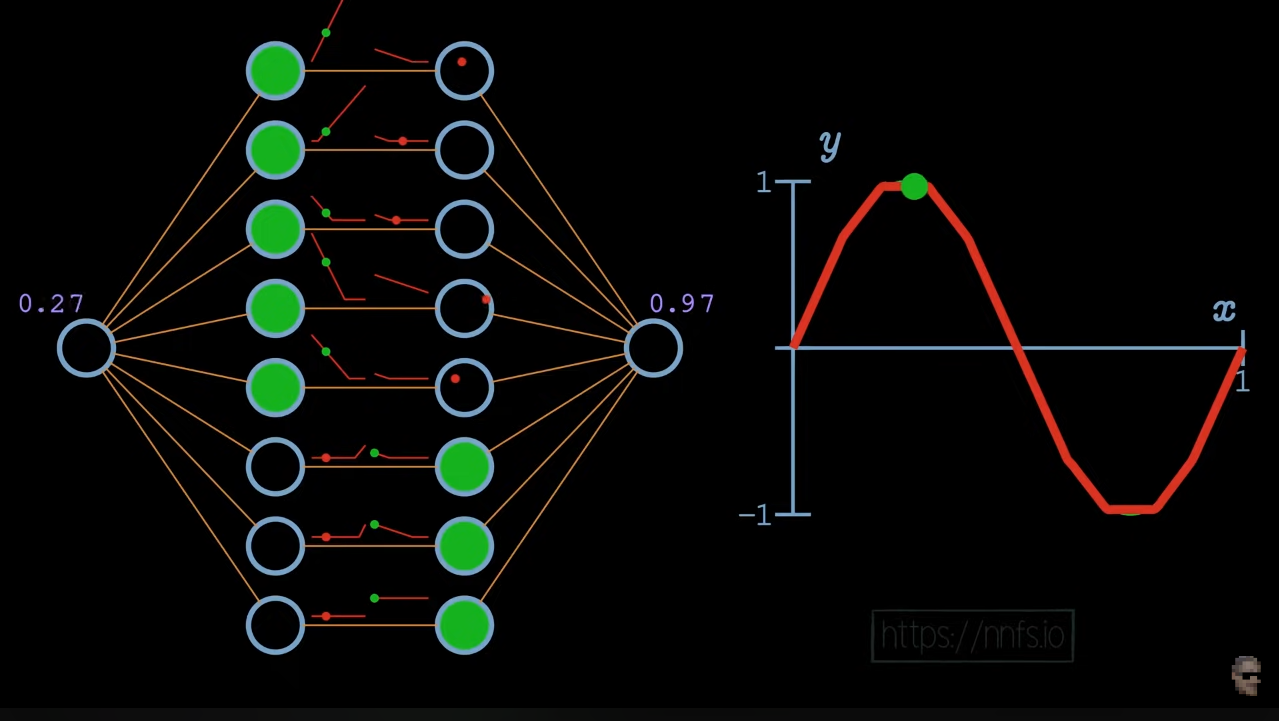

Each neuron tries to fit part of the sine wave, the second layer offsets to deactivate the neuron. To get better fits, more neurons are needed

In [8]:
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

In [9]:
for i in inputs:
    output.append(max(0, i))
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

## ReLU

In [10]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [11]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [12]:
X, y = spiral_data(100, 3)  # 100 features of 3 classes

In [13]:
layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

In [14]:
layer1.forward(X)
layer1.output

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-8.35815910e-04, -7.90404272e-04, -1.33452227e-03,
         4.65504505e-04,  4.56846210e-05],
       [-2.39994470e-03,  5.93469958e-05, -2.24808278e-03,
         2.03573116e-04,  6.10024377e-04],
       ...,
       [ 1.13291524e-01, -1.89262271e-01, -2.06855070e-02,
         8.11079666e-02, -6.71350807e-02],
       [ 1.34588361e-01, -1.43197834e-01,  3.09493970e-02,
         5.66337556e-02, -6.29687458e-02],
       [ 1.07817926e-01, -2.00809643e-01, -3.37579325e-02,
         8.72561932e-02, -6.81458861e-02]], dtype=float32)

In [15]:
activation1.forward(layer1.output)
activation1.output

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.65504505e-04,
        4.56846210e-05],
       [0.00000000e+00, 5.93469958e-05, 0.00000000e+00, 2.03573116e-04,
        6.10024377e-04],
       ...,
       [1.13291524e-01, 0.00000000e+00, 0.00000000e+00, 8.11079666e-02,
        0.00000000e+00],
       [1.34588361e-01, 0.00000000e+00, 3.09493970e-02, 5.66337556e-02,
        0.00000000e+00],
       [1.07817926e-01, 0.00000000e+00, 0.00000000e+00, 8.72561932e-02,
        0.00000000e+00]], dtype=float32)

In [16]:
## Softmax

In [17]:
# Intuition
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True) # row, axis = 1 ; columns,  axis = 0
norm_values

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

In [18]:
print(f"with keepdims \n {np.sum(exp_values, axis=1, keepdims=True)}")
print(f"without keepdims \n {np.sum(exp_values, axis=1)}")

with keepdims 
 [[ 135.72296484]
 [7333.35859605]
 [   7.98280655]]
without keepdims 
 [ 135.72296484 7333.35859605    7.98280655]


In [19]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [20]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [21]:
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

activation2.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33334488, 0.33332878, 0.33332634],
       [0.33337817, 0.3333157 , 0.33330616],
       [0.33339015, 0.333311  , 0.3332989 ]], dtype=float32)

## Loss

In [22]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [23]:
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
            
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [24]:
loss_func = Loss_CategoricalCrossEntropy()
loss_func.calculate(activation2.output, y)

1.0987109